`Final Project Submission`

Please fill out:
* Student name: `Hua Shi`
* Student pace: `full time`
* Scheduled project review date/time: 
* Instructor name: `SeanAbu Wilson`
* Blog post URL: 


# Import Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Load the data 

In [403]:
target=pd.read_csv('training_set_labels.csv').sort_values(by='id')
features=pd.read_csv('Training_set_values.csv').sort_values(by='id')

In [404]:
target.head()

,id,status_group
9410,0,non functional
18428,1,functional
12119,2,functional
10629,3,functional
2343,4,non functional


In [5]:
# check frist 5 row of train data
features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
9410,0,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
18428,1,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
12119,2,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
10629,3,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2343,4,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


In [6]:
target.shape

(59400, 2)

In [7]:
features.shape

(59400, 40)

In [8]:
df=target.merge(features,on='id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,non functional,0.0,2012-11-13,Tasaf,0,TASAF,33.125828,-5.118154,Mratibu,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
1,1,functional,0.0,2011-03-05,Shipo,1978,SHIPO,34.770717,-9.395642,none,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump


# Data Cleaning

In [877]:
# to see which columns have missing values
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [10]:
# check missing values
missing=pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns=['feature','missing_values']
missing.head()

,feature,missing_values
0,id,0
1,status_group,0
2,amount_tsh,0
3,date_recorded,0
4,funder,3635


In [14]:
# delete the columns which contains more than 20% missing values
col_names=[]
for i in range(len(missing)):
    if missing['missing_values'][i]/len(df)<=0.2:
        col_names.append(missing['feature'][i])
print(col_names)

['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [792]:
# remove all missing data 
df1=df[col_names].dropna(axis=0)
df1.shape

(48288, 40)

In [793]:
# double check if there are 
df1.isnull().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [794]:
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# Feature Engingeering 

## Target

In [795]:
# give value for status group and create a new column called target 
df1['target']=df1['status_group'].map({'functional':1,
                                        'functional needs repair':1,
                                        'non functional':0})
df1['target'].value_counts()

1    30015
0    18273
Name: target, dtype: int64

In [796]:
df1.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,0


In [797]:
df1.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'target'],
      dtype='object')

In [798]:
# check values for column =public_meeting
df1.recorded_by.value_counts()

GeoData Consultants Ltd    48288
Name: recorded_by, dtype: int64

## public_meeting

In [799]:
# convert into binary values 
bi_public_meeting=df1.public_meeting.map({True:1,False :0})
bi_public_meeting

2        1
3        1
4        1
5        1
6        1
        ..
59395    1
59396    0
59397    1
59398    1
59399    1
Name: public_meeting, Length: 48288, dtype: int64

In [800]:
df1.public_meeting=bi_public_meeting
df1.public_meeting

2        1
3        1
4        1
5        1
6        1
        ..
59395    1
59396    0
59397    1
59398    1
59399    1
Name: public_meeting, Length: 48288, dtype: int64

## recorded_by

In [801]:
df1.recorded_by.value_counts()

GeoData Consultants Ltd    48288
Name: recorded_by, dtype: int64

In [802]:
df2=df1.drop(columns='recorded_by')
df2.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'target'],
      dtype='object')

## scheme_management

In [803]:
df2.scheme_management.value_counts()

VWC                 32344
WUG                  4237
Water authority      2913
WUA                  2634
Water Board          2488
Parastatal           1294
Company              1028
Private operator      805
Other                 376
SWC                    97
Trust                  71
None                    1
Name: scheme_management, dtype: int64

In [804]:
df2.shape

(48288, 40)

In [805]:
df3=df2[df2['scheme_management']!='None']
df3.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,0


In [806]:
df3.shape # one row got removed

(48287, 40)

In [878]:
df3.scheme_management=df3.scheme_management.map({
'VWC'                 :1,
'WUG'                  :2,
'Water authority'      :3,
'WUA'                  :4,
'Water Board'          :5,
'Parastatal'           :6,
'Company'              :7,
'Private operator'      :8,
'Other'                 :9,
'SWC'                   : 10,
'Trust'                 : 11    
    
})

## 'permit'

In [808]:
df3.permit.value_counts()

True     33260
False    15027
Name: permit, dtype: int64

In [809]:
bi_permit=df3.permit.map({True:1,
                         False:0})
bi_permit

2        1
3        1
4        1
5        0
6        1
        ..
59395    0
59396    0
59397    0
59398    1
59399    1
Name: permit, Length: 48287, dtype: int64

In [879]:
 df3['permit']=bi_permit

In [811]:
df3.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,0


## extraction_type

In [812]:
keys=pd.DataFrame(df3['extraction_type'].value_counts()).reset_index()['index']
print(list(keys))

['gravity', 'nira/tanira', 'other', 'submersible', 'swn 80', 'mono', 'india mark ii', 'afridev', 'ksb', 'other - rope pump', 'other - swn 81', 'windmill', 'cemo', 'india mark iii', 'other - play pump', 'walimi', 'climax', 'other - mkulima/shinyanga']


In [813]:
extraction_type=df3['extraction_type'].map({'gravity':0, 
                            'nira/tanira':1, 
                            'other':2,
                            'submersible':3,
                            'swn 80':4, 
                            'mono':5, 
                            'india mark ii':6,
                            'afridev':7, 
                            'ksb':8,
                            'other - rope pump':9,
                            'other - swn 81':10,
                            'windmill':11,
                            'cemo':12, 
                            'india mark iii':13, 
                            'other - play pump':14,
                            'walimi':15,
                            'climax':16, 
                            'other - mkulima/shinyanga':17
    
    
     
})
extraction_type

2        5
3        0
4        1
5        3
6        2
        ..
59395    0
59396    0
59397    3
59398    0
59399    2
Name: extraction_type, Length: 48287, dtype: int64

In [880]:
df3['extraction_type']=extraction_type

In [815]:
df3.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,soft,good,seasonal,seasonal,shallow well,shallow well,groundwater,other,other,0


## management

In [816]:
df3['management'].value_counts()

vwc                 33576
wug                  4807
water board          2665
wua                  2288
private operator     1479
parastatal           1331
water authority       790
company               654
other                 449
other - school         99
trust                  75
unknown                74
Name: management, dtype: int64

In [817]:
df3['management']=df3['management'].map({
'vwc':                 0,
'wug' :                 1,
'water board':          2,
'wua'  :               3,
'private operator' :   4,
'parastatal' :          5,
'water authority'  :    6,
'company' :              7,
'other' :               8,
'other - school'   :     9,
'trust' :               10,
'unknown' :             11
})


## payment

In [51]:
df3.payment_type.value_counts()

never pay     20690
per bucket     7896
monthly        7542
unknown        4172
on failure     3642
annually       3417
other           928
Name: payment_type, dtype: int64

In [52]:
df3['payment_type']=df3.payment_type.map({
'never pay':     0,
'per bucket':     1,
'monthly':        2,
'unknown':        3,
'on failure':     4,
'annually':       5,
'other':           6    
})

In [55]:
df3['payment_type']

2        1
3        1
4        3
5        1
6        0
        ..
59395    3
59396    4
59397    0
59398    1
59399    1
Name: payment_type, Length: 48287, dtype: int64

## water_quality

In [61]:
df3.water_quality.value_counts()

soft                  42667
salty                  3717
unknown                 880
coloured                320
milky                   299
salty abandoned         231
fluoride                160
fluoride abandoned       13
Name: water_quality, dtype: int64

In [62]:
df3.water_quality=df3.water_quality.map({
'soft'                  :0,
'salty'                  :1,
'unknown'                 :2,
'coloured'                :3,
'milky'                   :4,
'salty abandoned'         :5,
'fluoride'                :6,
'fluoride abandoned'       :7   
})

In [63]:
df3['water_quality']

2        0
3        0
4        0
5        0
6        0
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: water_quality, Length: 48287, dtype: int64

## quantity

In [109]:
df3.quantity.value_counts()

0    28354
1    11799
2     4945
3     2899
4      290
Name: quantity, dtype: int64

In [66]:
df3.quantity=df3.quantity.map({
'enough'          :0,
'insufficient'    :1,
'dry'              :2,
'seasonal'         :3,
'unknown'          : 4   
})

In [67]:
df3.quantity

2        1
3        0
4        2
5        0
6        3
        ..
59395    1
59396    0
59397    0
59398    2
59399    2
Name: quantity, Length: 48287, dtype: int64

## source

In [58]:
df3.source.value_counts()

spring                  14852
shallow well            12415
machine dbh              8729
river                    8506
rainwater harvesting     1607
hand dtw                  779
lake                      604
dam                       581
other                     182
unknown                    32
Name: source, dtype: int64

In [69]:
df3.source=df3.source.map({
'spring'  :                0,
'shallow well' :           1,
'machine dbh' :             2,
'river'  :                  3,
'rainwater harvesting' :    4,
'hand dtw'              :    5,
'lake'                   :   6,
'dam'                     :  7,
'other'                    : 8,
'unknown'                   : 9   
})

In [70]:
df3.source

2        2
3        0
4        1
5        2
6        1
        ..
59395    4
59396    3
59397    6
59398    0
59399    3
Name: source, Length: 48287, dtype: int64

## 'waterpoint_type'

In [72]:
df3.waterpoint_type.value_counts()

communal standpipe             23836
hand pump                      13602
communal standpipe multiple     5459
other                           4651
improved spring                  651
cattle trough                     82
dam                                6
Name: waterpoint_type, dtype: int64

In [74]:
df3.waterpoint_type=df3.waterpoint_type.map({
'communal standpipe'             :0,
'hand pump'                      :1,
'communal standpipe multiple'     :2,
'other'                           :3,
'improved spring'                  :4,
'cattle trough'                    : 5,
'dam'                               : 6    
})

In [75]:
df3['waterpoint_type']

2        2
3        0
4        1
5        2
6        3
        ..
59395    0
59396    0
59397    2
59398    0
59399    0
Name: waterpoint_type, Length: 48287, dtype: int64

## Drop some columns we don't need 

In [76]:
df3.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
2,2,functional,0.0,2011-03-27,Lvia,0,LVIA,36.115056,-6.279268,Bombani,...,0,good,1,insufficient,2,borehole,groundwater,2,communal standpipe,1
3,3,functional,10.0,2013-06-03,Germany Republi,1639,CES,37.147432,-3.187555,Area 7 Namba 5,...,0,good,0,enough,0,spring,groundwater,0,communal standpipe,1
4,4,non functional,0.0,2011-03-22,Cmsr,0,CMSR,36.164893,-6.099289,Ezeleda,...,0,good,2,dry,1,shallow well,groundwater,1,hand pump,0
5,5,functional,50.0,2011-02-26,Private,28,Private,39.286124,-6.972403,Kwa Namaj,...,0,good,0,enough,2,borehole,groundwater,2,communal standpipe,1
6,6,non functional,0.0,2012-10-20,Government Of Tanzania,0,Government,33.229880,-3.852983,Mission,...,0,good,3,seasonal,1,shallow well,groundwater,3,other,0


In [112]:
# I will use those columns to analyze 
feature_col=['amount_tsh', 
       'gps_height',  'longitude', 'latitude',
       'num_private',  'region_code',
       'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management',
        'payment_type',  'water_quality',
        'quantity',  'source',
        'waterpoint_type', 'target']
# rename the data as df4
df4=df3[feature_col].dropna(axis=0)
df4.head()

In [125]:
# rename the data as df4
df4=df3[feature_col].dropna(axis=0)
df4.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,target
2,0.0,0,36.115056,-6.279268,0,1,4,0,1,1,1,0,5,0.0,1,0,1,2,2,1
3,10.0,1639,37.147432,-3.187555,0,3,5,25,1,5,1,1999,0,2.0,1,0,0,0,0,1
4,0.0,0,36.164893,-6.099289,0,1,4,0,1,1,1,0,1,0.0,3,0,2,1,1,0
5,50.0,28,39.286124,-6.972403,0,60,43,6922,1,8,0,0,3,4.0,1,0,0,2,2,1
6,0.0,0,33.229880,-3.852983,0,17,3,0,1,1,1,0,2,0.0,0,0,3,1,3,0


In [126]:
df4.shape

(47838, 20)

# Declare inputs and target

In [422]:
inputs=df4.drop(columns='target')
inputs.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type
2,0.0,0,36.115056,-6.279268,0,1,4,0,1,1,1,0,5,0.0,1,0,1,2,2
3,10.0,1639,37.147432,-3.187555,0,3,5,25,1,5,1,1999,0,2.0,1,0,0,0,0
4,0.0,0,36.164893,-6.099289,0,1,4,0,1,1,1,0,1,0.0,3,0,2,1,1
5,50.0,28,39.286124,-6.972403,0,60,43,6922,1,8,0,0,3,4.0,1,0,0,2,2
6,0.0,0,33.229880,-3.852983,0,17,3,0,1,1,1,0,2,0.0,0,0,3,1,3


In [423]:
inputs.shape

(47838, 19)

In [424]:
target=df4.target

In [425]:
target.shape

(47838,)

In [426]:
target.value_counts()

1    29745
0    18093
Name: target, dtype: int64

# Distribution of features

## Distribution of Target

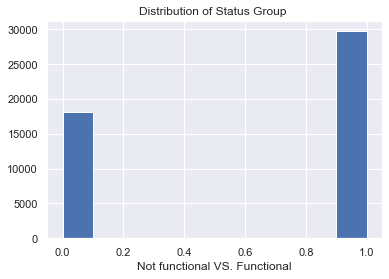

In [131]:
plt.hist(target)
plt.title("Distribution of Status Group ")
plt.xlabel("Not functional VS. Functional")
plt.show()

## Distribution of  Inputs

In [132]:
len(inputs.columns)

19

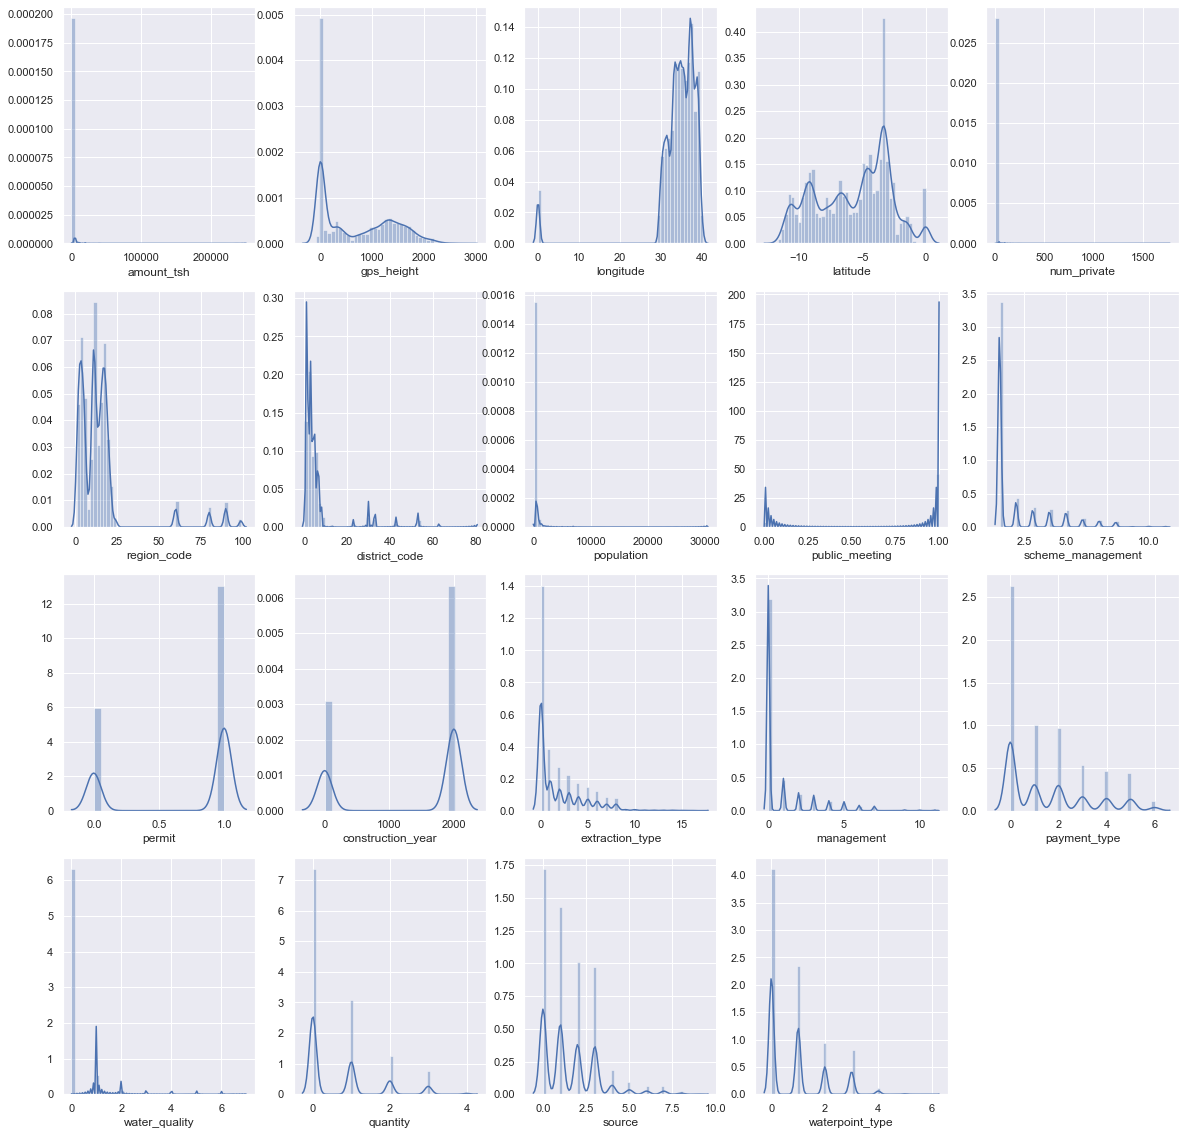

In [137]:
# loop distribution plot for inputs
plt.figure(figsize=(20,20))
plt.title('Distribution of Features')
for i in range(0,len(inputs.columns)):
    plt.subplot(4,5,i+1)
    sns.distplot(inputs[inputs.columns[i]])

# Train Test Split

In [885]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, random_state=10,test_size=0.2)


In [886]:
x_train=pd.DataFrame(data=x_train, columns=x_train.columns)
x_test=pd.DataFrame(data=x_test, columns=x_train.columns)

# Feature Selection

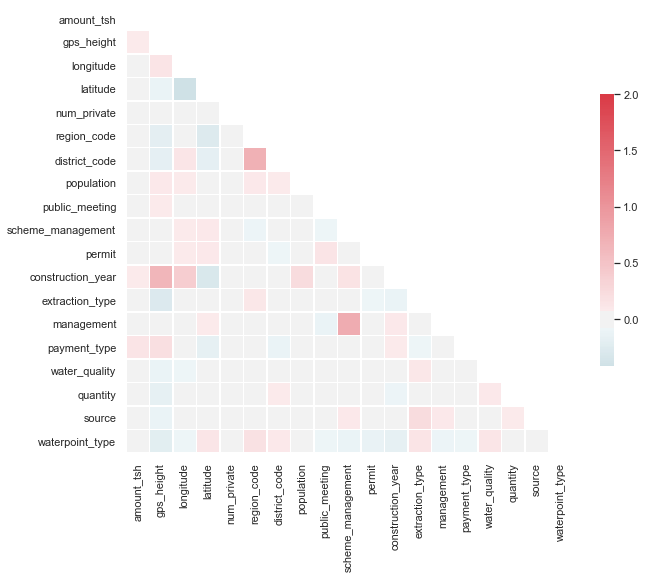

In [887]:

sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [888]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)
feature_columns=x_train.columns

In [889]:
x_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management', 'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [890]:
len(x_test.columns)

19

In [891]:
len(inputs.columns)

19

` No column got removed`

# Oversampling

In [892]:
 y_train.value_counts()

1    23797
0    14473
Name: target, dtype: int64

In [893]:
from sklearn.utils import resample
# concatenate our training data back together
training  = pd.DataFrame()
training[list(x_train.columns)]=x_train
training['target']=y_train
training.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,target
38506,0.0,1750,31.758419,-8.440978,0,15,2,100,1,1,1,1983,0,0.0,0,0,1,3,0,1
29679,20.0,840,31.556165,-7.675348,0,15,2,450,1,1,0,2002,4,0.0,1,0,0,2,1,1
57785,50.0,104,40.070614,-10.594051,0,99,1,470,1,1,1,2009,5,0.0,1,0,1,2,2,0
53557,0.0,0,32.997943,-4.125855,0,14,1,0,0,1,0,0,2,0.0,0,0,3,1,3,0
31908,0.0,0,33.963917,-3.130647,0,17,2,0,1,2,0,0,4,1.0,6,0,1,1,1,1


In [894]:
# separate minority and majority classes
not_func= training[training.target==0]
func= training[training.target==1]

In [895]:
# Get a class count to understand the class imbalance.
print('not funtional count: '+ str(len(not_func)))
print('funtional count: '+ str(len(func)))

not funtional count: 14473
funtional count: 23797


In [896]:
# upsample minority
not_func_upsampled = resample(not_func,
                          replace=True, # sample with replacement
                          n_samples=len(func), # match number in majority class
                          random_state=23) # reproducible results
not_func_upsampled.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,water_quality,quantity,source,waterpoint_type,target
1312,0.0,0,31.458407,-2.836076,0,18,4,0,1,1,1,0,2,0.0,0,0,0,2,3,0
50737,200.0,1149,33.385596,-2.154079,0,20,4,500,1,2,0,2003,2,1.0,2,3,1,1,3,0
50608,0.0,99,38.372789,-6.709759,0,6,2,2683,1,1,1,2002,1,0.0,0,0,1,1,1,0
57865,0.0,373,37.460789,-6.305267,0,5,6,1,1,1,1,1974,0,0.0,0,0,1,3,0,0
9112,0.0,385,38.242836,-4.890474,0,4,2,350,1,1,0,2002,0,0.0,0,0,0,0,2,0


In [897]:
# combine majority and upsampled minority
upsampled= pd.concat([func, not_func_upsampled])

# check new class counts
upsampled.target.value_counts()

1    23797
0    23797
Name: target, dtype: int64

In [898]:
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [899]:
x_train.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management', 'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

In [900]:
x_test.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management', 'payment_type', 'water_quality', 'quantity', 'source',
       'waterpoint_type'],
      dtype='object')

# data standardization

In [901]:
#import library for data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(x_train)

X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test)  

# KNN Model

## Import libraries

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Find the range of best k_neighbors basied on f1 and accuracy score

In [167]:
k_scores=[]
k_f1=[]
for i in range(0,300,10):
    knn= KNeighborsClassifier(n_neighbors=i+1)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred_class)) 
    k_f1.append(metrics.f1_score(y_test, y_pred_class))

In [168]:
max(k_scores),max(k_f1)

(0.81438127090301, 0.852882703777336)

In [179]:
k_scores.index(max(k_scores))

0

In [180]:
n_nei=11

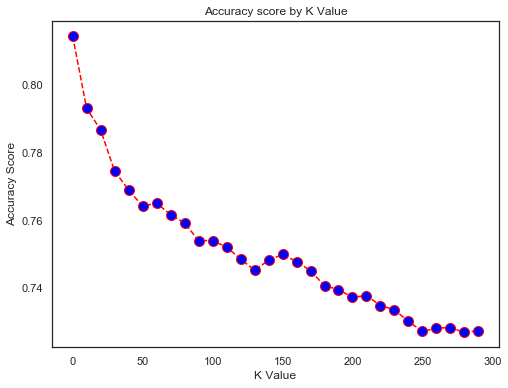

In [181]:
#plot k_value vs Accuracy score
plt.figure(figsize=(8, 6))  
plt.plot(list(range(0,300,10)), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

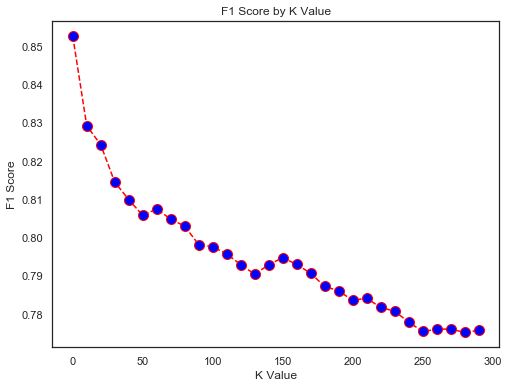

In [171]:
#plot k_value vs F score
plt.figure(figsize=(8, 6))  
plt.plot(list(range(0,300,10)), k_f1, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## minimize the range and redo the same process above

In [ ]:
k_scores1=[]
k_f1_1=[]
for i in range(n_nei-10,n_nei+10):
    knn= KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    k_scores1.append(metrics.accuracy_score(y_test, y_pred_class)) 
    k_f1_1.append(metrics.f1_score(y_test, y_pred_class))

In [ ]:
max(k_scores1),max(k_f1_1)

In [ ]:
print(" Range of best n_neighbors:{}".format(k_scores.index(max(k_scores1))+n_nei))
print(" Range of best n_neighbors:{}".format(k_f1.index(max(k_f1_1))+n_nei))

In [ ]:
n_neighbors=k_f1.index(max(k_f1_1))+n_nei

## Final KNN model 

In [1048]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

In [1050]:
y_train_pre=knn.predict(X_train)

In [1055]:
print('accuracy_score of train data :{}'.format (accuracy_score(y_train,y_train_pre)))
print('f1_score of train data:{}'.format(f1_score(y_train,y_train_pre))) 
# # make class predictions for the testing set


accuracy_score of train data :0.9981720384922469
f1_score of train data:0.998175373838636


In [1056]:
y_pred_class = knn.predict(X_test)
print('accuracy_score of test data :{}'.format (accuracy_score(y_test, y_pred_class)))
print('f1_score of test data:{}'.format(f1_score(y_test, y_pred_class)) )

accuracy_score of test data :0.81438127090301
f1_score of test data:0.852882703777336


In [206]:
gs.best_score_,gs.best_params_

(0.8881502835686833, {'n_neighbors': 1})

# Random Forest Model

## GridSearch -- n_etimators

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
score_rf=[]
for i in range(0,300,10):
    rf=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf.append(scores)

In [209]:
print("Max score: {}".format(max(score_rf)))

Max score: 0.9268276903569467


In [210]:
print("range of n_estimater:{}".format(score_rf.index(max(score_rf))*10+1))

range of n_estimater:251


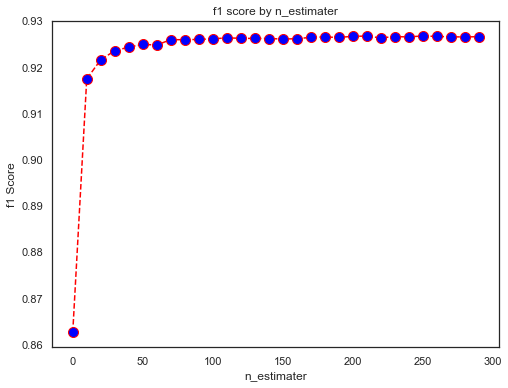

In [211]:
plt.figure(figsize=(8, 6))  
plt.plot(list(range(0,300,10)), score_rf, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('f1 score by n_estimater')  
plt.xlabel('n_estimater')  
plt.ylabel('f1 Score') 
plt.show()

In [212]:
# loop again using smaller range of n_estimator
score_rf1=[]
for i in range(251-10,251+10):
    rf=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf1.append(scores)

In [213]:
print("Max score: {}".format(max(score_rf1)))

Max score: 0.926847501155828


In [217]:
print("range of n_estimater:{}".format(score_rf1.index(max(score_rf1))+240))

range of n_estimater:255


In [255]:
n_estimators=255

## GridSearch -- max_depth

In [218]:
score_rf_2=[]
for i in range(1,300,10):
    rf=RandomForestClassifier(n_estimators=255,max_depth=i+1,n_jobs=-1,random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_2.append(scores)

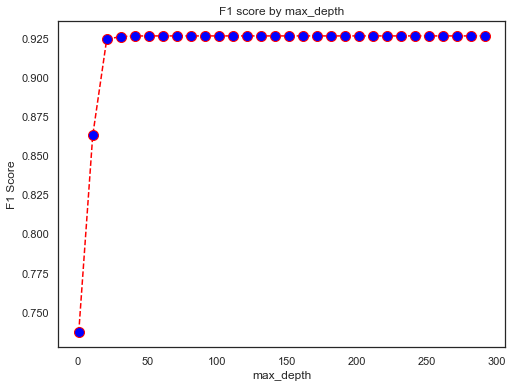

In [219]:
# plot the learning rate to see how does it change
plt.figure(figsize=(8, 6))  
plt.plot( list(range(1,300,10)), score_rf_2, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by max_depth')  
plt.xlabel('max_depth')  
plt.ylabel('F1 Score') 
plt.show()

In [220]:
print("f1_score: " + str(max(score_rf_2)))
print('Max_depth: '+ str(score_rf_2.index(max(score_rf_2))*10+1))

f1_score: 0.926695954766115
Max_depth: 51


In [245]:
score_rf_3=[]
for i in range(51-10,51+10):
    rf=RandomForestClassifier(n_estimators=255,max_depth=i,n_jobs=-1,random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_3.append(scores)

In [249]:
print("f1_score: " + str(max(score_rf_3)))
print('Max_depth: '+ str(score_rf_3.index(max(score_rf_3))+41))

f1_score: 0.9267443175325202
Max_depth: 41


In [250]:
score_rf_4=[]
for i in range(38,42):
    rf=RandomForestClassifier(n_estimators=255,max_depth=i,n_jobs=-1,random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_4.append(scores)
print("f1_score: " + str(max(score_rf_4)))
print('Max_depth: '+ str(score_rf_4.index(max(score_rf_4))+38))

f1_score: 0.9267443175325202
Max_depth: 41


In [252]:
max_depth=41

## GridSearch -- min_samples_leaf

In [256]:
score_rf_5=[]
for i in range(0,300,10):
    rf=RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              min_samples_leaf=i+1,
                              n_jobs=-1,
                              random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_5.append(scores)
print("f1_score: " + str(max(score_rf_5)))
print('min_samples_leaf: '+ str(score_rf_5.index(max(score_rf_5))*10+1))

f1_score: 0.9267443175325202
min_samples_leaf: 1


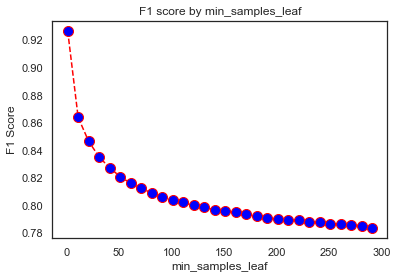

In [258]:
# plot the learning rate to see how does it change
plt.figure(figsize=(6, 4))  
plt.plot( list(range(1,300,10)), score_rf_5, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by min_samples_leaf')  
plt.xlabel('min_samples_leaf')  
plt.ylabel('F1 Score') 
plt.show()

In [259]:
min_samples_leaf=1

##  GridSearch-- min_samples_split

In [273]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [275]:
score_rf_6=[]
for i in np.arange(2,2+20,1):
    rf=RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              min_samples_leaf=1,
                              min_samples_split=i+1,
                              n_jobs=-1,
                              random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_6.append(scores)


f1_score: 0.9253014386770726
min_samples_leaf: 1


In [276]:
print("f1_score: " + str(max(score_rf_6)))
print('min_samples_leaf: '+ str(score_rf_6.index(max(score_rf_6))+2+1))

f1_score: 0.9253014386770726
min_samples_leaf: 3


In [278]:
np.arange(2,2+20,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

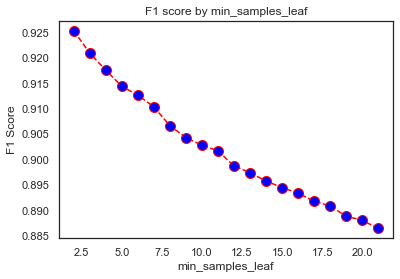

In [277]:
# plot the learning rate to see how does it change
plt.figure(figsize=(6, 4))  
plt.plot( np.arange(2,2+20,1), score_rf_6, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by min_samples_leaf')  
plt.xlabel('min_samples_leaf')  
plt.ylabel('F1 Score') 
plt.show()

In [280]:
score_rf_7=[]
for i in [1,2,3,4]:
    rf=RandomForestClassifier(n_estimators=n_estimators,
                              max_depth=max_depth,
                              min_samples_leaf=1,
                              min_samples_split=i,
                              n_jobs=-1,
                              random_state=9)
    scores=cross_val_score(rf,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_7.append(scores)

In [281]:
max(score_rf_7)

0.9267443175325202

In [285]:
score_rf_7.index(max(score_rf_7))+2

2

In [289]:
min_samples_split=2

## GridSearchCV 

In [ ]:
# I run it  more than two hours ....  so I recommand that using loop gridsreach  instead of using GridSearchCV

In [221]:
# from sklearn.model_selection import GridSearchCV

In [241]:
# random_grid={'min_samples_leaf':list(range(1,100))}
#             #'min_sample_split':}

In [242]:
# rfc=RandomForestClassifier(n_estimators=255,
#                            max_depth=Max_depth,
#                            n_jobs=-1,
#                            random_state=9)


In [257]:
# GS=GridSearchCV(rfc,random_grid,cv=10)
# GS.fit(x_train,y_train)
# GS.best_params_,GS.best_score_

##  Final Random Forest model 

In [902]:
rf=RandomForestClassifier(n_estimators=n_estimators,
                           max_depth=max_depth,
                           min_samples_leaf=min_samples_leaf,
                           min_samples_split=min_samples_split,
                          n_jobs=-1,random_state=9)

In [903]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=41, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=255,
                       n_jobs=-1, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [904]:
print('Accuracy score of train data :{}'.format(rf.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(rf.score(X_test,y_test)))
# 0.998844392150271
# 0.8561872909698997

Accuracy score of train data :0.998844392150271
Accuracy score of test data:0.8561872909698997


In [1012]:
# obtian train data f1_Score
pre_train=rf.predict(X_train)
print('Train data f1_Score:{}'.format(f1_score(y_train, pre_train)))
# Obtain Test data f1_Score
smote_pred=rf.predict(X_test)
print('Test data f1_Score:{}'.format(f1_score(y_test, smote_pred)))

Train data f1_Score:0.9988446106337835
Test data f1_Score:0.886804870023034


## Confusion Matrix

In [1069]:
confusion=metrics.confusion_matrix(y_test, smote_pred)
print(confusion)

[[2802  818]
 [ 558 5390]]


In [1064]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, smote_pred)
classes = ['Functional', 'Not Functional']

In [1065]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[2802  818]
 [ 558 5390]]


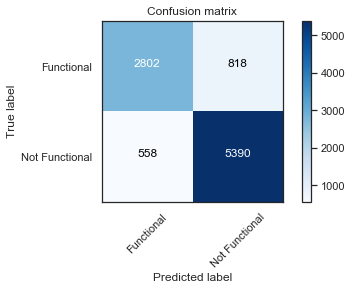

In [1066]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [1070]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [1071]:
precision=TP / float(TP + FP)
precision

0.8682345360824743

In [1072]:
recall=TP / float(TP + FN)
recall

0.9061869535978481

In [1075]:
precision=metrics.precision_score(y_test, smote_pred)
recall=metrics.recall_score(y_test, smote_pred)
precision,recall

(0.8682345360824743, 0.9061869535978481)

In [ ]:
x_axis=['Not Functional', 'Functional']

,target
1,5948
0,3620


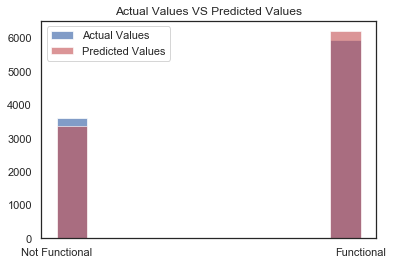

In [1094]:
plt.hist(y_test,alpha=0.7,color='b',label='Actual Values')
plt.hist(smote_pred,alpha=0.6,color='r',label='Predicted Values')
plt.title('Actual Values VS Predicted Values')
plt.xticks([0, 1],['Not Functional', 'Functional'])
plt.legend()
plt.show()

## Fit overall data 

In [397]:
#overall data inputs and target
scaler.fit(inputs)

scaled_inputs = scaler.transform(inputs)

In [398]:
## overall data  using inputs and target
rf_overall=RandomForestClassifier(n_estimators=n_estimators,
                           max_depth=max_depth,
                           min_samples_leaf=min_samples_leaf,
                           min_samples_split=min_samples_split,
                          n_jobs=-1,random_state=9)
rf_overall.fit(scaled_inputs,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=41, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=255,
                       n_jobs=-1, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)

In [974]:
print('Accuracy score of overall data :{}'.format(rf_overall.score(scaled_inputs,target)))
pre_overall=rf_overall.predict(scaled_inputs)
print('Overall data f1_Score:{}'.format(f1_score(target, pre_overall)))

Accuracy score of overall data :0.9989966135708015
Overall data f1_Score:0.999193304426742


# Decision Tree

In [318]:
# import library
from sklearn.tree import DecisionTreeClassifier 

## max_depth

In [312]:
# obtian the range of the best max_depth
score_rf_8=[]
for i in range(0,300,10):
    dtc=DecisionTreeClassifier(max_depth=i+1,
                              random_state=9)
    scores=cross_val_score(dtc,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_8.append(scores)

In [313]:
print('f1_score: ' + str(max(score_rf_8)))
print('max_depth: '+ str(score_rf_8.index(max(score_rf_8))*10+1))

f1_score: 0.8996356135172261
max_depth: 31


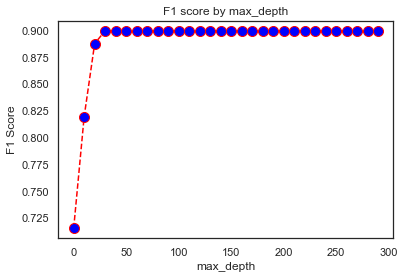

In [361]:
# plot the learning rate to see how does it change
plt.figure(figsize=(6, 4))  
plt.plot( list(range(0,300,10)), score_rf_8, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by max_depth')  
plt.xlabel('max_depth')  
plt.ylabel('F1 Score') 
plt.show()

In [315]:
# obtian more specific value of max_depth
score_rf_9=[]
for i in range(21,42):
    dtc=DecisionTreeClassifier(max_depth=i,
                              random_state=9)
    scores=cross_val_score(dtc,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_9.append(scores)

In [316]:
print('f1_score: ' + str(max(score_rf_9)))
print('max_depth: '+ str(score_rf_9.index(max(score_rf_9))+21))

f1_score: 0.8998820872155937
max_depth: 33


In [317]:
dt_max_depth=33

## Criterion

In [345]:

score_rf_10=[]
for i in ['gini','entropy'] :
    dtc=DecisionTreeClassifier(max_depth=dt_max_depth,
                               criterion=i,
                              random_state=9)
    scores=cross_val_score(dtc,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_10.append(scores)

In [347]:
score_rf_10  # 'entropy' is slightly better than gini 

[0.8998820872155937, 0.8998844541057756]

In [348]:
dtc_criterion='entropy' 

## splitter

In [355]:
# obtian the range of the best max_depth
score_rf_11=[]
for i in ['best','random'] :
    dtc=DecisionTreeClassifier(max_depth=dt_max_depth,
                               criterion=dtc_criterion,
                               splitter=i,
                              random_state=9)
    scores=cross_val_score(dtc,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_11.append(scores)

In [356]:
score_rf_11# ' Best' is better  so no need to change because the default is ' best'

[0.8998844541057756, 0.8986662825435984]

## min_samples_split

In [359]:
# obtian the range of the best max_depth
score_rf_12=[]
for i in range(2,300,10) :
    dtc=DecisionTreeClassifier(max_depth=dt_max_depth,
                               criterion=dtc_criterion,
                               min_samples_split=i,
                              random_state=9)
    scores=cross_val_score(dtc,X_train,y_train,cv=10,scoring='f1').mean()
    score_rf_12.append(scores)

In [360]:
max(score_rf_12)

0.8998844541057756

In [362]:
score_rf_12.index(max(score_rf_12))*10+2

2

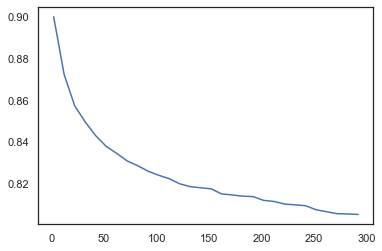

In [363]:
plt.plot(range(2,300,10),score_rf_12)

## Final model 

In [365]:
dtc_final=DecisionTreeClassifier(max_depth=dt_max_depth,
                               criterion=dtc_criterion,
                              random_state=9)

In [366]:
dtc_final.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=33, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')

In [367]:
print('Accuracy score of train data :{}'.format(dtc_final.score(X_train,y_train)))
print('Accuracy score of test data:{}'.format(dtc_final.score(X_test,y_test)))

Accuracy score of train data :0.9968903643316385
Accuracy score of test data:0.8233695652173914


In [368]:
# obtian train data f1_Score
dt_pre_train=dtc_final.predict(X_train)
print('Train data f1_Score:{}'.format(f1_score(y_train,dt_pre_train)))
# Obtain Test data f1_Score
dt_smote_pred=dtc_final.predict(X_test)
print('Test data f1_Score:{}'.format(f1_score(y_test, dt_smote_pred)))

Train data f1_Score:0.9968910175615493
Test data f1_Score:0.8595178719866999


# Model Evaluation- Random Forest


## Random forest feature importance

In [1059]:
len(x_train.columns)

19

In [924]:
importances = rf.feature_importances_

In [1100]:
feature_importance=pd.DataFrame()
feature_importance['feature']=x_train.columns
feature_importance['weight']=importances 
table=feature_importance.sort_values(by='weight',ascending=False)
table

,feature,weight
2,longitude,0.152317
3,latitude,0.150947
16,quantity,0.125699
1,gps_height,0.078166
18,waterpoint_type,0.071324
11,construction_year,0.067001
12,extraction_type,0.063983
7,population,0.053213
14,payment_type,0.036072
0,amount_tsh,0.035224


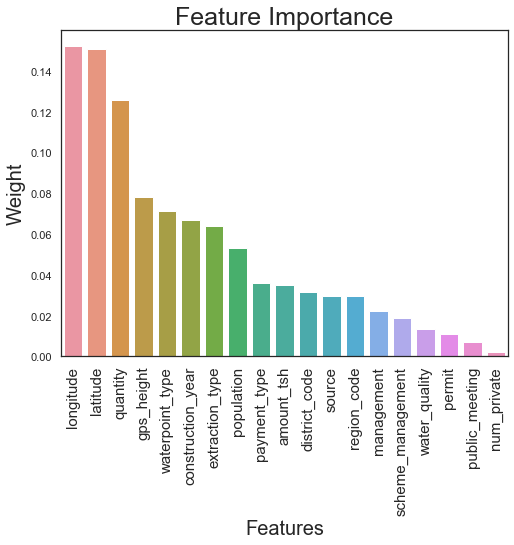

In [1106]:
plt.figure(figsize=(8,6))
sns.barplot(table['feature'],table['weight'])
plt.xticks(np.arange(len(x_train.columns)),rotation=90,size=15)
plt.title('Feature Importance',fontsize=25)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Weight',fontsize=20)
plt.show()

## import geo_map 



In [1021]:
from PIL import Image

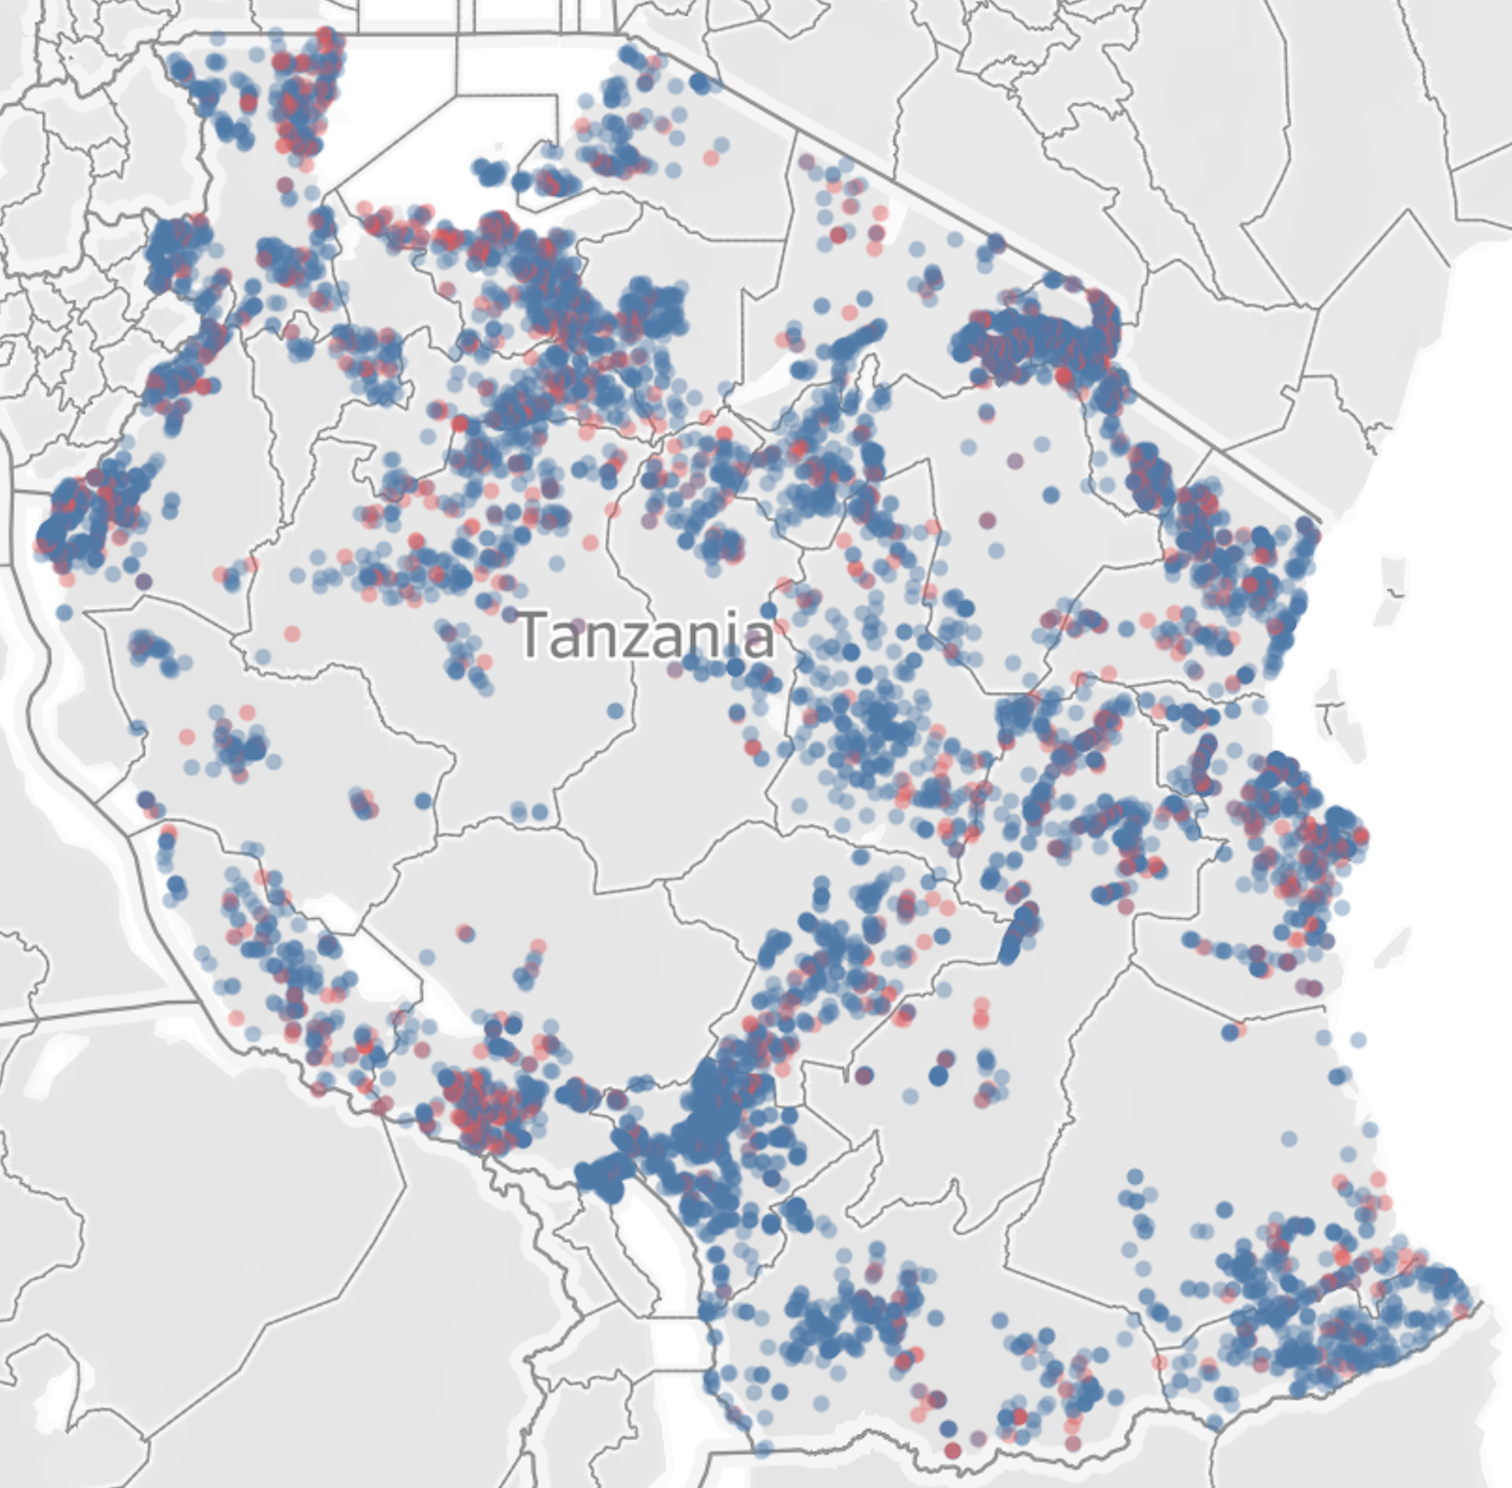

In [1057]:
Image.open('map.png')


Using X_test data to predict y_test_predition data and compare with y_test (actual values)

Red points are wrong prediction and the blue ones are predicted correctly.